Machine Learning Lab 1
======
### Альромхин Джорж, гр.858301

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

#### 1. Load data

In [32]:
data_row1 = np.genfromtxt('../Data/lab1/ex1data1.txt', delimiter=',')
data1 = pd.DataFrame(data_row1, columns=list(['Population', 'Profit']))
data1.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


#### 2. Build a graph of the dependence of the profit of the restaurant on the population of the city in which it is located.

<Figure size 432x288 with 0 Axes>

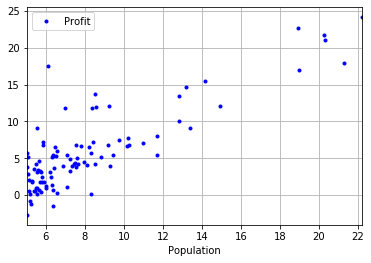

In [5]:
plt.figure()
data1.plot(x='Population', y='Profit',  style=['b.'])
plt.grid(True)
plt.show()

#### 3. Cost function

In [12]:
def compute_cost(X, y, theta):
    h = [np.matmul(x, theta.T).sum() for x in X]
    return np.power(h - y, 2).sum() / (2 * m)

In [10]:
m = data_row1.shape[0] # Size of training set
n = data_row1.shape[1] # Size of feature vector
X1 = data1[['Population']]
X1.insert(0, 'theta_0', 1)
y1 = data1['Profit']
# theta the coefficients of the linear equation
theta = np.zeros((1, n))
X1.head()

,theta_0,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [13]:
cost = compute_cost(X1.to_numpy(), y1.to_numpy(), theta)
print('Cost =', cost)

Cost = 32.072733877455676


#### 4. Implement the gradient descent function to select model parameters. Build the resulting model (function) together with the graph

In [83]:
'''
function [theta, J_history] = gradient_dscent(X, y, theta, alpha, number_iterations)
taking num_iters gradient steps with learning rate alpha
'''
def gradient_descent(X, y, theta, alpha, number_iterations):
    m = y.shape[0] 
    n = X.shape[1]
    j_history = []
    for i in range(0, number_iterations):
        deltas = np.zeros(n)
        for j in range(0, n):
            xj = X[:, j]
            h = [np.matmul(x, theta.T)[0] for x in X]
            deltas[j] = ((h - y) * xj).sum() * alpha / m
        theta[0] -= deltas
        j_history.append(compute_cost(X, y, theta))

    return theta, j_history

In [17]:
iterations = 1500
alpha = 0.01
(theta, j_history) = gradient_descent(X1.to_numpy(), y1.to_numpy(), theta, alpha, iterations)

In [18]:
print('gradient descent thera: ', theta)

gradient descent thera:  [[-3.63029144  1.16636235]]


In [53]:
print('for population = 35,000, profit prediction: ', (np.matmul([1, 3.5], theta.T).sum() * 10000)) #1st predict
print('for population = 70,000, profit prediction', (np.matmul([1, 7], theta.T).sum() * 10000)) #2nd predict

for population = 35,000, profit prediction:  4519.767867701772
for population = 70,000, profit prediction 45342.45012944714


In [54]:
h = [np.matmul(x, theta.T).sum() for x in X1.to_numpy()]
data1_plot = data1.join(pd.DataFrame({'Linear regression': h}))

<Figure size 432x288 with 0 Axes>

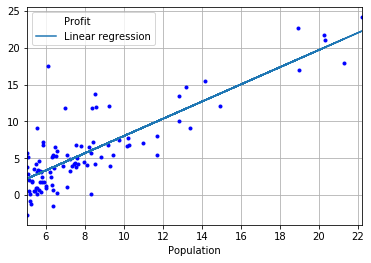

In [30]:
plt.figure()
ax = data1_plot.plot(x='Population', y='Profit',  style=['b.'])
data1_plot.plot(x='Population', y='Linear regression', ax=ax)
plt.grid(True)
plt.show()

#### 5. Build a three-dimensional graph of the dependence of the loss function on the parameters of the model (θ0 and θ1) as a surface and as contours (contour plot).

In [36]:
theta0_vals = np.linspace(-10, 10, num=100)
theta1_vals = np.linspace(-1, 4, num=100)
# initialize J values to a matrix of 0
J_vals = np.zeros((theta0_vals.size, theta1_vals.size))

In [37]:
# Fill J values
for i in range(0, theta0_vals.size):
    for j in range(0, theta1_vals.size):
        t = np.array([[theta0_vals[i], theta1_vals[j]]])
        J_vals[i, j] = computeCost(X1.to_numpy(), y1.to_numpy(), t)
        
J_vals = J_vals.T

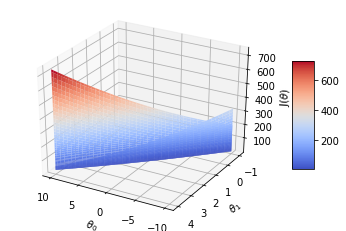

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(theta0_vals,theta1_vals,J_vals,cmap="coolwarm")
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel(r'J($\theta$)')
ax.view_init(30,120)#rotate for better angle
plt.show()

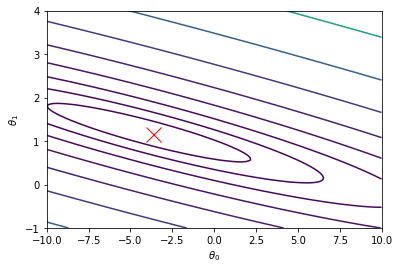

In [55]:
# Contour plot
plt.figure()
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
ax = plt.contour(theta0_vals, theta1_vals, J_vals, np.logspace(-2, 3, 20))
#plt.clabel(ax, inline=0, fontsize=2)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.plot(theta[0, 0], theta[0, 1], 'rx', linewidth=1, markersize=15)
plt.show()

#### 6. Load Data

In [76]:
data_row2 = np.genfromtxt('../Data/lab1/ex1data2.txt', delimiter=',')
data2 = pd.DataFrame(data_row2, columns=list(['size', 'number', 'price']))
data2.head()

,size,number,price
0,2104.0,3.0,399900.0
1,1600.0,3.0,329900.0
2,2400.0,3.0,369000.0
3,1416.0,2.0,232000.0
4,3000.0,4.0,539900.0


#### 7.Normalize the signs. Did this affect the rate of convergence of the gradient descent? Give the answer in the form of a graph.

In [84]:
def normalization(X):
    norm = (X - X.mean(axis=0)) / X.std(axis=0)
    mu = X.mean(axis=0)
    sigma = X.std(axis=0)
    return norm, mu, sigma
    

In [79]:
X = data2[['size', 'number']]
X_norm, mu, sigma = normalization(X)
X_norm.describe()

,size,number
count,4.700000e+01,4.700000e+01
mean,3.779483e-17,2.185013e-16
std,1.000000e+00,1.000000e+00
min,-1.445423e+00,-2.851859e+00
25%,-7.155897e-01,-2.236752e-01
50%,-1.417900e-01,-2.236752e-01
75%,3.376348e-01,1.090417e+00
max,3.117292e+00,2.404508e+00


In [80]:
y = data2['price']
m = y.size
n = data_row2.shape[1]
X.insert(0, 'theta_0', 1)
X_norm.insert(0, 'theta_0', 1)

theta1 = np.zeros((1, n))
theta2 = np.zeros((1, n))

In [81]:
(theta1, j_history) = gradient_descent(X.to_numpy(), y.to_numpy(), theta1, 0.00000001, 50)
(theta2, j_norm_history) = gradient_descent(X_norm.to_numpy(), y.to_numpy(), theta2, 0.1, 50)

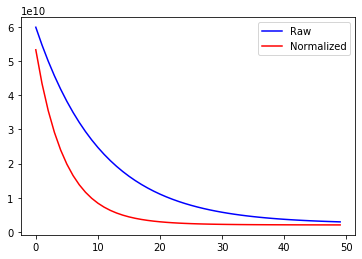

In [82]:
p1 = plt.plot(range(0, len(j_history)), j_history, color='blue')
plt.legend('Raw')
p2 = plt.plot(range(0, len(j_norm_history)), j_norm_history, color='red')
plt.legend((p1[0], p2[0]), ('Raw', 'Normalized'))
plt.show()

#### 8. Implement the loss functions J(θ) and gradient descent for the case of multivariate linear regression using vectorization.


In [86]:
def gradient_descent2(X, y, theta, alpha, number_iterations):
    m = y.shape[0] 
    j_history = []
    XT = X.T
    for i in range(0, number_iterations):
        h = [np.matmul(x, theta.T)[0] for x in X]
        loss = h - y
        cost = np.sum(loss ** 2) / (2 * m)
        gradient = np.matmul(XT, loss) / m
        theta[0] -= alpha * gradient
        j_history.append(cost)

    return theta, j_history

In [87]:
iterations = 400
alpha = 0.01
theta_GD = np.zeros((1, n))

(theta_GD, j_history) = gradient_descent2(X_norm.to_numpy(), y.to_numpy(), theta_GD, alpha, iterations)
print('Theta :', theta_GD)

Theta : [[334302.06399328 100087.11600585   3673.54845093]]


In [92]:
price = np.array([1, (1650 - mu[0]) / sigma[0], (4 - mu[1]) / sigma[1]]) @ theta_GD.T
print('price prediction for 4 rooms house: ', price)

price prediction for 4 rooms house:  [294141.99995712]


#### 9.Show that vectorization gives a performance boost

In [96]:
from timeit import default_timer as timer

iterations = 1000
alpha = 0.02
theta = np.zeros((1, n))

start = timer()
(theta, j_history) = gradient_descent(X_norm.to_numpy(), y.to_numpy(), theta, alpha, iterations)
end = timer()
exec_time1 = end-start
print('theta', theta)
print('time excuted:', exec_time1)

theta [[340412.65900156 110620.78816241  -6639.21215439]]
time excuted: 0.7502348749985686


In [95]:
theta = np.zeros((1, n))

start = timer()
(theta, j_history) = gradient_descent2(X_norm.to_numpy(), y.to_numpy(), theta, alpha, iterations)
end = timer()
exec_time2 = end-start

print('theta', theta)
print('time excuted:', exec_time2)

theta [[340412.65900156 110620.78816241  -6639.21215439]]
time excuted: 0.17354223399888724


In [105]:
diff = (exec_time1 / exec_time2)
print(diff,'faster')

4.323067980117043 faster


#### 10. Try changing the parameter ɑ (learning factor). How does the graph of the loss function change depending on the number of iterations of the gradient descent? Draw the result as a graph.

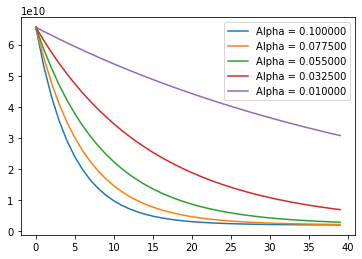

In [101]:
alphas = np.linspace(0.1, 0.01, num=5)
plots = []
for alpha in alphas:
    theta = np.zeros((1, n))
    (theta, j_history) = gradient_descent2(X_norm.to_numpy(), y.to_numpy(), theta, alpha, 40)
    p = plt.plot(range(0, len(j_history)), j_history)
    plots.append(p[0])
    
plt.legend(plots, ["Alpha = %f" % (x) for x in alphas])
plt.show()

#### 11.Build a model using an analytical solution that can be obtained by the least squares method. Compare the results of this model with the model obtained by gradient descent.

In [109]:
# computes the closed-form solution to linear regression using the normal equations
def normal_equations(X, y):
    XX = np.asmatrix(X)
    XT = XX.T
    return ((XT @ XX).I @ XT) @ y

In [115]:
theta_A = normal_equations(X.to_numpy(), y.to_numpy())
print('theta from normal equations', theta_A)
print('theta from the normal normalized gradient descent: %s' % (theta_GD))

price = np.array([1, 1200, 4]) @ theta_A.T
print('price prediction of 1200 sq. ft, 4 rooms house (using normal equations):', price)

price = np.array([1, (1200 - mu[0]) / sigma[0], (4 - mu[1]) / sigma[1]]) @ theta_GD.T
print('price prediction of 1200 sq. ft, 4 rooms house (using gradient descent):', price)

theta from normal equations [[89597.9095428    139.21067402 -8738.01911233]]
theta from the normal normalized gradient descent: [[334302.06399328 100087.11600585   3673.54845093]]
price prediction of 1200 sq. ft, 4 rooms house (using normal equations): [[221698.64191464]]
price prediction of 1200 sq. ft, 4 rooms house (using gradient descent): [237467.6966757]
